# 1. Análisis exploratorio de datos (EDA)

Los datos que tenemos son:
1. datos_champions_limpio.csv - Información general sobre la Champions League de distintos años.
2. overall_limpio.csv - Información adicional que contine datos de equipos y partidos.
3. jugadores_limpio.csv - Datos específicos sobre jugadores.

### Paso 1: Carga y revisión inicial de los datos

In [25]:
#Importamos las librerias necesarias
import pandas as pd

In [26]:
#Cargamos los datos
data_champions= pd.read_csv('../data/datos_champions_limpio.csv')
overall= pd.read_csv('../data/overall_limpio.csv')
jugadores= pd.read_csv('../data/jugadores_limpio.csv')

In [27]:
#Revision incial de los datos, dimensiones y primeros registros
estructura_datos= {
    'datos_champions':{
        'dimensiones': data_champions.shape,
        'primeros_registros': data_champions.head(5)
    },
    'overall':{
        'dimensiones': overall.shape,
        'primeros_registros': overall.head(5)
    },
    'jugadores':{
        'dimensiones': jugadores.shape,
        'primeros_registros': jugadores.head(5)

    }
}

estructura_datos

{'datos_champions': {'dimensiones': (574, 13),
  'primeros_registros':       Season        Round  Day        Date Time           Home Score  \
  0  2003-2004  Round of 16  Tue  2004-02-24  NaN     Celta Vigo   2–3   
  1  2003-2004  Round of 16  Tue  2004-02-24  NaN  Bayern Munich   1–1   
  2  2003-2004  Round of 16  Tue  2004-02-24  NaN  Sparta Prague   0–0   
  3  2003-2004  Round of 16  Tue  2004-02-24  NaN    Loko Moscow   2–1   
  4  2003-2004  Round of 16  Wed  2004-02-25  NaN          Porto   2–1   
  
             Away Attendance              Venue          Referee  Match Report  \
  0         Arsen        NaN           Balaídos     Anders Frisk  Match Report   
  1     Real Madr        NaN     Olympiastadion      Terje Hauge  Match Report   
  2         Milan        NaN      Stadion Letná      Graham Poll  Match Report   
  3          Mona        NaN  Stadion Lokomotiv  Mejuto González  Match Report   
  4  Manchester U        NaN  Estádio do Dragão   Herbert Fandel  Match Re

### Paso 2: Identificación de Variables Clave y Visualizaciones

Algunas variables que intuitivamente se ven que son valiosas son:
* Para jugadores: Goles, asistencias, goles esperados (xG), asistencias esperadas (xA).
* Para equipos: Goles a favor y en contra, puntos, posición final en el torneo.

##### Análisis datos equipos

Para ver la relación entre las variables usaré una matriz de correlación para el conjunto de datos de los equipos (overall)
con lo que observaremos cómo las variables estadísticas de los equipos se relacionan entre sí y con el éxito (por ejemplo, llegar a las fases finales del torneo).

In [28]:
#Importamos las librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# Conversión de la columna 'Rk' a una escala numérica para poder correlacionarla
rank_conversion = {'W': 1, 'F': 2, 'SF': 3, 'QF': 4, 'R16': 5, 'R32': 6, 'GS': 7}
overall['Rk_numerico'] = overall['Rk'].map(rank_conversion)

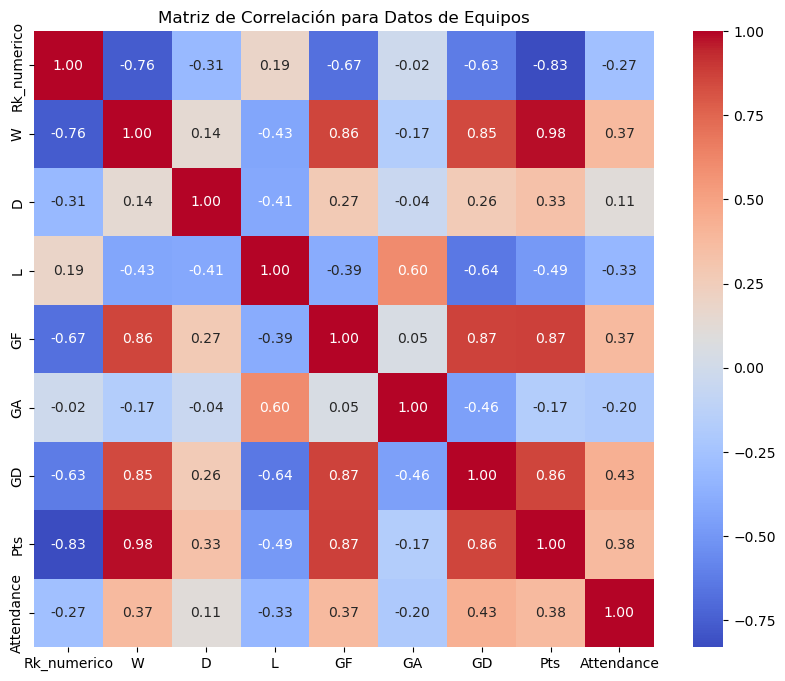

In [30]:
# Calculamos la matriz de correlación para las variables numéricas relevantes
correlation_matrix = overall[['Rk_numerico', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Attendance']].corr()

# Generamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Datos de Equipos')
plt.show()


La matriz de correlación para los datos de los equipos revela varias relaciones interesantes:

1. **Relación con el Ranking Numérico (Rk_numerico):** Esta variable, que representa el éxito del equipo en la Champions League (donde 1 es el ganador y los números más altos indican una eliminación más temprana), muestra fuertes correlaciones negativas con las victorias (W) y los puntos (Pts). Esto significa que, como se esperaba, cuantas más victorias y más puntos tenga un equipo, más probable es que avance a las etapas finales del torneo.

2. **Goles a Favor (GF) y Diferencia de Goles (GD):** Ambos tienen fuertes correlaciones negativas con el ranking numérico, indicando que los equipos que marcan más goles y tienen una mayor diferencia de goles tienden a llegar más lejos en el torneo.

3. **Goles en Contra (GA):** Tiene una correlación positiva más débil con el ranking numérico, lo que sugiere que, aunque los goles en contra impactan negativamente en el rendimiento del equipo, su efecto es menos pronunciado que el de marcar goles.

Estas correlaciones apuntan a la importancia de las variables relacionadas con el desempeño ofensivo (goles a favor, diferencia de goles) y el éxito general (victorias, puntos) como predictores potenciales del éxito en la Champions League.

##### Análisis datos jugadores

Primero, voy a examinar la distribución de estas variables clave y cómo se relacionan con el rendimiento del equipo (utilizando la información del conjunto de datos overall para relacionar el rendimiento de los jugadores con el éxito del equipo).

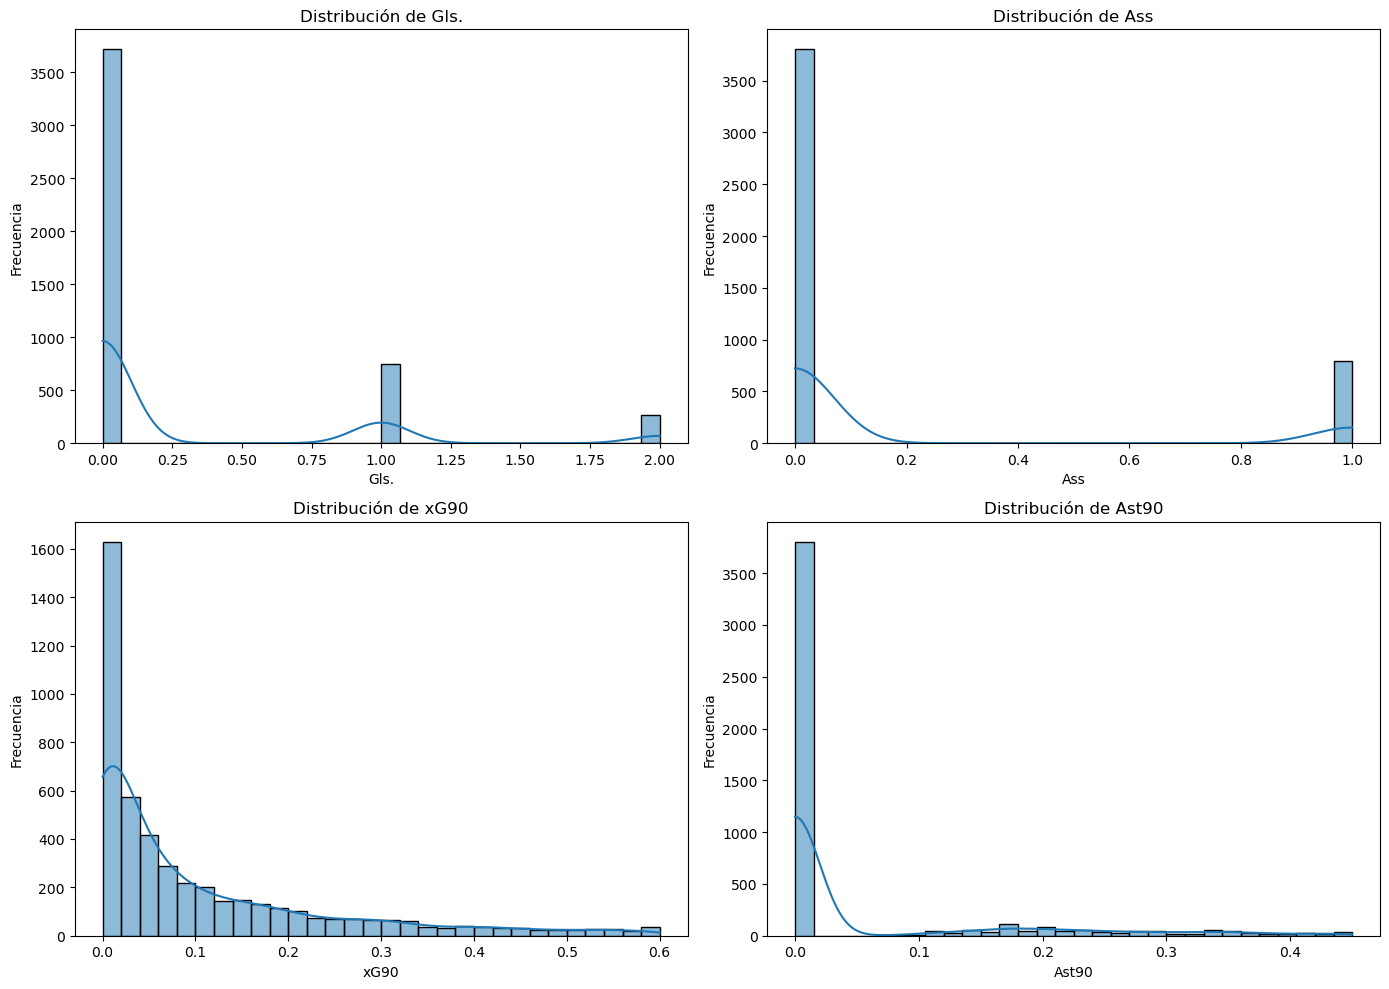

In [31]:
#Vamos a analizar  goles, asistencias, goles esperados por 90 minutos y asistencias esperadas por 90 minutos
#Procedemos a visualizar la distribución de las variables de interés para entender  las contribuciones individuales de los jugadores y su posible impacto en el éxito de los equipos en la Champions League. ​

# Corrección de los nombres de las variables de jugadores y generación de las visualizaciones
variables_jugadores_corregidas = ['Gls.', 'Ass', 'xG90', 'Ast90']

# Configuramos la visualización corregida
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Generamos un histograma para cada variable corregida
for i, variable in enumerate(variables_jugadores_corregidas):
    # Filtramos los valores extremos para mejorar la visualización
    data_filtered = jugadores[jugadores[variable] < jugadores[variable].quantile(0.95)]
    sns.histplot(data_filtered[variable], bins=30, ax=axs[i], kde=True)
    axs[i].set_title(f'Distribución de {variable}')
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Las distribuciones de las métricas clave para los jugadores muestran varias tendencias interesantes:

1. **Goles (Gls.):** La mayoría de los jugadores anotan pocos goles, con una distribución sesgada hacia el lado derecho, indicando que solo unos pocos jugadores logran anotar una cantidad significativa de goles.

2. **Asistencias (Ass):** Similar a los goles, la mayoría de los jugadores tienen pocas asistencias, reflejando que las contribuciones significativas en términos de asistencias también están concentradas en un grupo más pequeño de jugadores.

3. **Goles Esperados por 90 minutos (xG90):** Esta métrica sigue una distribución similar a la de los goles, donde la mayoría de los jugadores tienen valores bajos, sugiriendo que las oportunidades de gol de alta calidad son limitadas para la mayoría.

4. **Asistencias Esperadas por 90 minutos (Ast90):** La distribución es igualmente sesgada, con la mayoría de los jugadores generando pocas oportunidades claras de asistencia.

Estas observaciones sugieren que tanto las contribuciones directas (goles y asistencias) como las potenciales (xG90 y Ast90) están altamente concentradas en un número relativamente pequeño de jugadores. Esta característica de los datos es crucial para la modelización, ya que indica que el impacto de los **jugadores estrella** podría ser un factor determinante del éxito de los equipos en la Champions League.



### Paso 3:  Preparación de Datos para el Modelo de Regresión Lineal

Para avanzar hacia la construcción de un modelo de regresión lineal, necesitamos preparar nuestros datos adecuadamente. Esto incluye la integración de los conjuntos de datos para relacionar las métricas de los jugadores con el éxito de los equipos, la selección de características basada en nuestro análisis exploratorio, y la división de los datos en conjuntos de entrenamiento y prueba.

Dado que los conjuntos de datos contienen información a nivel de partido, equipo, y jugador a lo largo de varias temporadas, un desafío clave será consolidar estos datos de manera que podamos modelar el éxito en la Champions League (por ejemplo, llegar a las fases finales o ganar el torneo) como una función de las variables seleccionadas.

Para construir el modelo efectivo consideramos lo siguiente:

1. **Variable Dependiente (Y):** El éxito de los equipos en la Champions League, posiblemente representado por su etapa final en el torneo o una transformación de esta variable para facilitar el análisis.

2. **Variables Independientes (X):** Un conjunto de características seleccionadas basadas en nuestros análisis, incluyendo métricas a nivel de equipo (por ejemplo, goles a favor, diferencia de goles) y a nivel de jugador (por ejemplo, goles, asistencias, xG, xA).

####  Integración de Datos y Selección de Características

Dado que estamos interesados en predecir el éxito de los equipos en la Champions League, nuestra variable dependiente estará relacionada con el rendimiento del equipo en el torneo, mientras que nuestras variables independientes incluirán tanto estadísticas de equipo como de jugador.

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Fusionamos datos de jugadores y equipo

# Preparación de estadísticas agregadas de jugadores por equipo y temporada
jugadores_agregados = jugadores.groupby(['Temporada', 'Equipo']).agg({
    'Gls.': 'sum',
    'Ass': 'sum',
    'xG90': 'mean',
    'Ast90': 'mean'
}).reset_index()

jugadores_agregados.rename(columns={
    'Gls.': 'Total_Goles_Jugadores',
    'Ass': 'Total_Asistencias_Jugadores',
    'xG90': 'Promedio_xG90_Jugadores',
    'Ast90': 'Promedio_Ast90_Jugadores'
}, inplace=True)

# Fusionamos los datos de equipo ('overall') con los datos agregados de jugadores
# Corrección en la fusión de los conjuntos de datos para usar los nombres correctos de las columnas
datos_modelo = pd.merge(overall, jugadores_agregados, how='left', left_on=['Season', 'Squad'], right_on=['Temporada', 'Equipo'])

# Seleccionamos las columnas relevantes para el modelo
datos_modelo_seleccionados = datos_modelo[['Rk_numerico', 'GF', 'GA', 'GD', 'Pts', 'Total_Goles_Jugadores', 'Total_Asistencias_Jugadores', 'Promedio_xG90_Jugadores', 'Promedio_Ast90_Jugadores']]

# Limpieza de datos: Eliminamos filas donde 'Rk_numerico' es NaN
datos_modelo_limpio = datos_modelo_seleccionados.dropna(subset=['Rk_numerico'])

# Preparación de los datos (X: características, Y: variable objetivo) con datos limpios
X_limpio = datos_modelo_limpio.drop('Rk_numerico', axis=1)
y_limpio = datos_modelo_limpio['Rk_numerico']

# Imputación de valores faltantes en las características con la media
imputer = SimpleImputer(strategy='mean')
X_imputed_limpio = imputer.fit_transform(X_limpio)

# División de los datos en conjuntos de entrenamiento y prueba
X_train_limpio, X_test_limpio, y_train_limpio, y_test_limpio = train_test_split(X_imputed_limpio, y_limpio, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train_limpio, y_train_limpio)

# Predicciones en el conjunto de prueba
y_pred_limpio = modelo.predict(X_test_limpio)

# Evaluación del modelo
mse_limpio = mean_squared_error(y_test_limpio, y_pred_limpio)
r2_limpio = r2_score(y_test_limpio, y_pred_limpio)

print(f'MSE: {mse_limpio}, R^2: {r2_limpio}')

MSE: 0.41609098690585217, R^2: 0.6981921936663059


El MSE es una medida de la calidad del modelo que indica el error cuadrático medio entre los valores predichos y los reales; un valor más bajo es mejor. El R² es un indicador de cuánto de la variabilidad en los datos es explicada por el modelo; un valor más cercano a 1 indica un mejor ajuste.

Con un R² de aproximadamente 0.7, nuestro modelo explica alrededor del 70% de la variabilidad en el éxito de los equipos en la Champions League, basado en las variables seleccionadas, lo cual es un resultado prometedor. Sin embargo, siempre hay espacio para la mejora, y podríamos considerar pasos adicionales como la selección de características más detallada, la inclusión de más variables potencialmente predictivas, o la exploración de modelos más complejos.

### Conclusiones:

Algunas conclusiones relevantes que sacamos son:

1. **Análisis Exploratorio de Datos (EDA):** Reveló la importancia de ciertas métricas de equipo y jugador, como los goles a favor, la diferencia de goles, y las estadísticas individuales de jugadores como goles y asistencias, en el éxito de los equipos en la Champions League.

2. **Integración de Datos:** La consolidación de estadísticas de equipo y jugador en un conjunto de datos unificado fue crucial para nuestro análisis, permitiéndonos capturar tanto el rendimiento del equipo como las contribuciones individuales de los jugadores.

3. **Modelo de Regresión Lineal:** Con un R² de aproximadamente 0.7, el modelo pudo explicar una parte significativa de la variabilidad en el éxito de los equipos en la Champions League. Este resultado sugiere que las variables seleccionadas tienen un impacto considerable en el rendimiento del equipo en el torneo.

4. **Potencial para Mejoras y Expansión:** Aunque nuestro modelo proporcionó insights valiosos, existe el potencial para mejoras adicionales. Esto podría incluir la exploración de modelos más complejos, la incorporación de más variables (como métricas defensivas o el contexto de los partidos), y la validación cruzada para mejorar la robustez del modelo.

5. **Aplicabilidad Práctica:** Este estudio ofrece una base metodológica para equipos, entrenadores, y analistas que buscan entender y predecir el éxito en competiciones futbolísticas. Los insights derivados podrían ayudar en la toma de decisiones estratégicas, la preparación de partidos, y el scouting de jugadores.

6. **Reflexión Final:** La modelización predictiva en el deporte es un campo complejo y dinámico, influenciado por numerosos factores dentro y fuera del campo. Mientras que los modelos estadísticos pueden ofrecer pronósticos y entender patrones, siempre deben complementarse con el conocimiento experto y el contexto específico del deporte.